In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# データセットのダウンロード
# KaggleのDogs vs Cats　データセットをフィルタリングしたバージョンを使用
# データセットのアーカイブバージョンをダウンロードし, "/tmp/"ディレクトリに保存
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# 訓練及び検証データのファイルパスを変数に格納
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
# 訓練及び検証データにおけるネコとイヌのディレクトリを変数に格納
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
# 画像の枚数を出力
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('training cat images:', num_cats_tr)
print('training dog images:', num_dogs_tr)

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('validation cat images:', num_cats_val)
print('validation dog images:', num_dogs_val)

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print('Total training images:', total_train)
print('Total validation images:', total_val)

training cat images: 1000
training dog images: 1000
validation cat images: 500
validation dog images: 500
Total training images: 2000
Total validation images: 1000


In [5]:
# ジェネレーターを生成し、画像を加工処理する
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# データセットの前処理及びネットワークの学習中に使用する変数を設定
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# ジェネレータの生成
# 1. ディスクから画像を読み取る
# 2. 画像のコンテンツをでこーどし、RGB値に従って適切なグリッド形式に変換
# 3. 浮動小数点型Tensorオブジェクトに変換
# 4. テンソルを0〜255の値から0〜1の値にスケーリング
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# flow_from_directory()メソッドでディスクから画像を読み込み
# スケーリングを適用し、画像を必要な大きさにリサイズ
# 訓練データ
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
# 検証データ
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


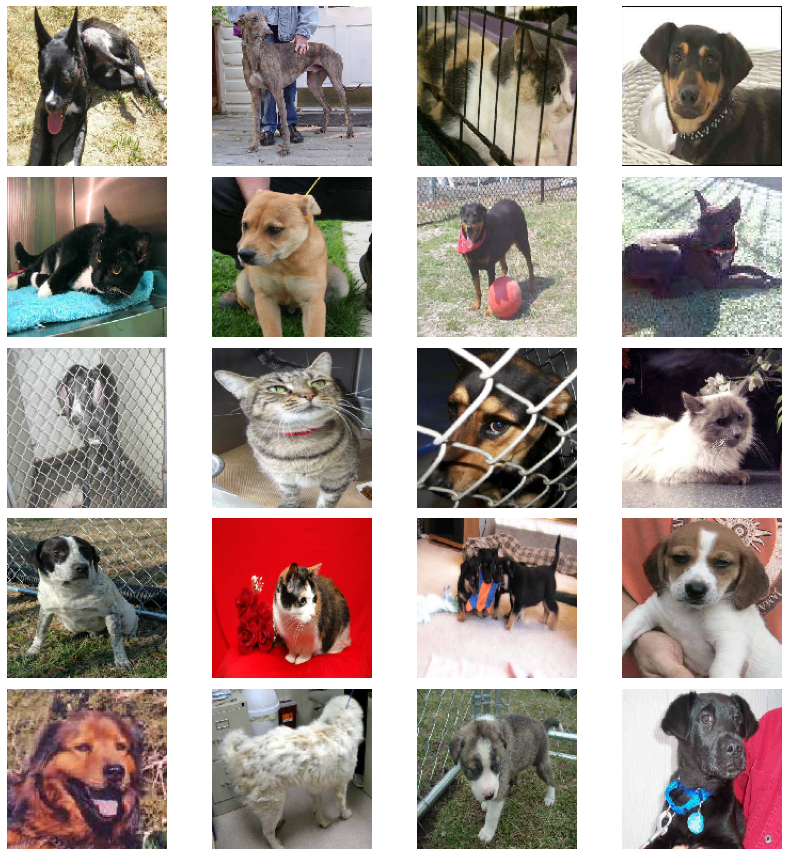

In [7]:
import matplotlib.pyplot as plt

# 学習用のジェネレータからミニバッチを抽出
sample_training_images, _ = next(train_data_gen)

# この関数は1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます
def plotImages(images_arr):
    fig, axes = plt.subplots(5, 4, figsize=(12, 12))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:20])

### ネコとイヌを認識させてみる

In [8]:
import os
import tensorflow as tf

# データセットのダウンロード
# KaggleのDogs vs Cats　データセットをフィルタリングしたバージョンを使用
# データセットのアーカイブバージョンをダウンロードし, "/tmp/"ディレクトリに保存
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# 訓練及び検証データのファイルパスを変数に格納
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [9]:
'''
2. ジェネレーターを生成し、画像を加工処理する
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def ImageDataGenerate(train_dir, validation_dir):
    '''
    画像を加工する
    Returns:
        train_generator(DirectoryIterator)
            訓練データのジェネレーター
        validation_generator(DirectorIterator)
            検証データのジェネレーター
    '''

    # データセットの前処理及びネットワークの学習中に使用する変数を設定
    batch_size = 32
    IMG_HEIGHT = 150
    IMG_WIDTH = 150

    # ジェネレータの生成
    # 訓練データ
    train_image_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1
    )
    # 検証データ
    validation_image_generator = ImageDataGenerator(rescale=1./255)

    # flow_from_directory()メソッドでディスクから画像を読み込み
    # スケーリングを適用し、画像を必要な大きさにリサイズ
    # 訓練データ
    train_data_gen = train_image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=train_dir,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='binary'
    )
    # 検証データ
    val_data_gen = validation_image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=train_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='binary'
    )

    # 生成した訓練データと検証データを返す
    return train_data_gen, val_data_gen

In [12]:
'''
3. モデルの生成から学習までを実行する関数
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras import optimizers

def train_CNN(train_data_gen, val_data_gen):
    '''
    CNNで学習する
    Returns:
        history(Historyオブジェクト)
    '''
    # 画像のサイズを取得
    image_size = len(train_data_gen[0][0][0])
    # 入力データの形状をタプルにする
    input_shape = (image_size, image_size, 3)
    # ミニバッチのサイズを取得
    batch_size = len(train_data_gen[0][0])
    # 訓練データの数を取得（バッチ数＊ミニバッチサイズ）
    total_train = len(train_data_gen) * batch_size
    # 検証データの数を取得（）バッチ数＊ミニバッチサイズ
    total_validation = len(val_data_gen) * batch_size

    # モデルを構築
    model = Sequential()

    # 第1層　畳み込み層
    model.add(
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            input_shape=input_shape,
            padding='same',
            activation='relu'
        )
    )
    # 第2層 プーリング層
    model.add(
        MaxPooling2D(pool_size=(2, 2))
    )
    # ドロップアウト25%
    model.add(Dropout(0.25))

    # 第3層　畳み込み層
    model.add(
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation='relu'
        )
    )
    # 第4層 プーリング層
    model.add(
        MaxPooling2D(pool_size=(2, 2))
    )
    # ドロップアウト25%
    model.add(Dropout(0.25))

    # 第5層　畳み込み層
    model.add(
        Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation='relu'
        )
    )
    # 第6層 プーリング層
    model.add(
        MaxPooling2D(pool_size=(2, 2))
    )
    # ドロップアウト25%
    model.add(Dropout(0.25))

    # Flatten層
    # 出力層への入力を4階テンソルから2階テンソルに変換する
    model.add(Flatten())

    # 第7層　全結合層
    model.add(
        Dense(64, activation='relu')
    )
    # ドロップアウト50%
    model.add(Dropout(0.5))

    # 第8層　出力層
    model.add(
        Dense(1, activation='sigmoid')
    )

    # モデルのコンパイル
    model.compile(
        loss='binary_crossentropy',
        metrics=['accuracy'],
        # Adamアルゴリズムで最適化
        optimizer=optimizers.Adam()
    )

    # モデルのサマリを表示
    model.summary()

    # ファインチューニングモデルで学習する
    epochs = 60
    history = model.fit(
        # 訓練データ
        train_data_gen,
        # エポック数
        epochs=epochs,
        # 検証データ
        validation_data=val_data_gen,
        # 検証時のステップ
        validation_steps=total_validation // batch_size,
        # 訓練時のステップ
        steps_per_epoch=total_train // batch_size,
        # 学習の進捗状況を出力する
        verbose=1
    )

    return history

In [13]:
%%time
'''
4. 学習を行う
'''
# データジェネレーターを取得
train_data_gen, val_data_gen = ImageDataGenerate(train_dir, validation_dir)
history = train_CNN(train_data_gen, val_data_gen)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 73, 73, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                    

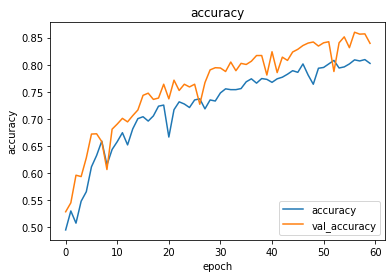

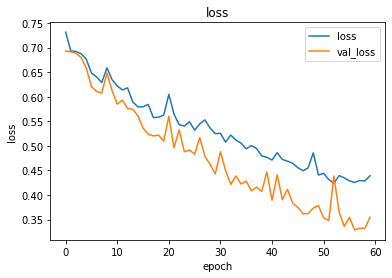

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_acc_loss(history):
    # 精度の推移をプロット
    plt.plot(history.history['accuracy'], '-', label='accuracy')
    plt.plot(history.history['val_accuracy'], '-', label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.show()

    # 損失の推移をプロット
    plt.plot(history.history['loss'], '-', label='loss')
    plt.plot(history.history['val_loss'], '-', label='val_loss')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()

# 損失と精度をグラフに出力
plot_acc_loss(history)

### 「転移学習」でイヌとネコを高精度で分類する

In [17]:
import os
import tensorflow as tf

# データセットのダウンロード
# KaggleのDogs vs Cats　データセットをフィルタリングしたバージョンを使用
# データセットのアーカイブバージョンをダウンロードし, "/tmp/"ディレクトリに保存
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# 訓練及び検証データのファイルパスを変数に格納
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [18]:
'''
2. ジェネレーターを生成し、画像を加工処理する
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def ImageDataGenerate(train_dir, validation_dir):
    '''
    画像を加工する
    Returns:
        train_generator(DirectoryIterator)
            訓練データのジェネレーター
        validation_generator(DirectorIterator)
            検証データのジェネレーター
    '''

    # データセットの前処理及びネットワークの学習中に使用する変数を設定
    batch_size = 32
    IMG_HEIGHT = 150
    IMG_WIDTH = 150

    # ジェネレータの生成
    # 訓練データ
    train_image_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1
    )
    # 検証データ
    validation_image_generator = ImageDataGenerator(rescale=1./255)

    # flow_from_directory()メソッドでディスクから画像を読み込み
    # スケーリングを適用し、画像を必要な大きさにリサイズ
    # 訓練データ
    train_data_gen = train_image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=train_dir,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='binary'
    )
    # 検証データ
    val_data_gen = validation_image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=train_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='binary'
    )

    # 生成した訓練データと検証データを返す
    return train_data_gen, val_data_gen

In [20]:
'''
3. モデルの生成から学習までを実行する関数
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalMaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import LearningRateScheduler
import math

def train_FClayer(train_data_gen, val_data_gen):
    '''
    ファインチューニングしたVGG16で学習する
    Returns:
        history(Historyオブジェクト)
    '''
    # 画像のサイズを取得
    image_size = len(train_data_gen[0][0][0])
    # 入力データの形状をタプルにする
    input_shape = (image_size, image_size, 3)
    # ミニバッチのサイズを取得
    batch_size = len(train_data_gen[0][0])
    # 訓練データの数を取得（バッチ数＊ミニバッチサイズ）
    total_train = len(train_data_gen) * batch_size
    # 検証データの数を取得（）バッチ数＊ミニバッチサイズ
    total_validation = len(val_data_gen) * batch_size

    # VGG16モデルを学習済みの重みと共に読み込む
    pre_trained_model = VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )

    for layer in pre_trained_model.layers[:15]:
        # 第1~15層の重みを凍結
        layer.trainable = False

    for layer in pre_trained_model.layers[15:]:
        # 第15層以降の重みを更新可能にする
        layer.trainable = True

    # モデルを構築
    model = Sequential()

    # VGG16モデルを追加
    model.add(pre_trained_model)

    # (batch_size, rows, cols, channels)の4階テンソルに
    # プーリング演算適用後、（batch_size, channels）の2階テンソルにフラット化
    model.add(GlobalMaxPooling2D())

    # 全結合層
    model.add(
        Dense(512, activation='relu')
    )
    # ドロップアウト50%
    model.add(Dropout(0.5))

    # 出力層
    model.add(
        Dense(1, activation='sigmoid')
    )

    # モデルのコンパイル
    model.compile(
        loss='binary_crossentropy',
        metrics=['accuracy'],
        optimizer=optimizers.RMSprop(lr=1e-5)
    )

    # モデルのサマリを表示
    model.summary()

    # 学習率をスケジューリングする
    def step_decay(epoch):
        initial_lrate = 0.00001
        drop = 0.5
        epochs_drop = 10.0
        lrate = initial_lrate * math.pow(
            drop,
            math.floor((epoch) / epochs_drop)
        )
        return lrate
    
    # 学習率のコールバック
    lrate = LearningRateScheduler(step_decay)

    # ファインチューニングモデルで学習する
    epochs = 40
    history = model.fit(
        # 訓練データ
        train_data_gen,
        # エポック数
        epochs=epochs,
        # 検証データ
        validation_data=val_data_gen,
        # 検証時のステップ
        validation_steps=total_validation // batch_size,
        # 訓練時のステップ
        steps_per_epoch=total_train // batch_size,
        # 学習の進捗状況を出力する
        verbose=1,
        # 学習率のスケジューラーをコール
        callbacks=[lrate]
    )

    return history

In [ ]:
%%time
'''
4. 学習を行う
'''
# データジェネレーターで加工
train_data_gen, val_data_gen = ImageDataGenerate(train_dir, validation_dir)
# VGG16の出力をFCネットワークで学習
history = train_FClayer(train_data_gen, val_data_gen)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/40
63/63 [==============================] - 849s 14s/step - loss: 0.6516 - accuracy: 0.6285 - val_loss: 0.4312 - val_accuracy: 0.8460 - lr: 1.0000e-05
Epoch 2/40
63/63 [==============================] - 850s 14s/step - loss: 0.4499 - accuracy: 0.7925 - val_loss: 0.2870 - val_accuracy: 0.8930 - lr: 1.0000e-05
Epoch 3/40
63/63 [==============================] - 850s 14s/step - loss: 0.3550 - accuracy: 0.8490 - val_loss: 0.2274 - val_accuracy: 0.9140 - lr: 1.0000e-05
Epoch 4/40
63/63 [==============================] - 849s 14s/step - loss: 0.3129 - accuracy: 0.8655 - val_loss: 0.1920 - val_accuracy: 0.9295 - lr: 1.0000e-05
Epoch 5/40
63/63 [==============================] - 849s 14s/step - loss: 0.2620 - accuracy: 0.8875 - val_loss: 0.1665 - val_accuracy: 0.9340 - lr: 1.0000e-05
Epoch 6/40
63/63 [==============================] - ETA: 0s - loss: 0.2383 - accuracy: 0.9095